In [1]:
#importing necessary libraries and functions 
import keras
from keras.models import Sequential
import tensorflow as tf 
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the data 

data = pd.read_csv("fer2013.csv")
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
data_array = np.array(data)
record = data_array.size
print(record)

107661


In [5]:
#creating training , validation and test set data 
#intialize training set and test set.

x_train, y_train, x_test, y_test, x_val, y_val =[],[],[],[],[],[]
for i in range(len(data_array)):
    try:
        
        emotion = data_array[i][0]
        img = data_array[i][1]
        usage = data_array[i][2]
        
        val = img.split(" ")
        pixels = np.array(val,'float32')
        
        num_classes = len(data['emotion'].unique())
        #convert emotion to a categorial variable.
        emotion = keras.utils.to_categorical(emotion, num_classes)
        
        #append emotion and data in training, validation and test_data
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PrivateTest' in usage:
            y_val.append(emotion)
            x_val.append(pixels)
        else:
            y_test.append(emotion)
            x_test.append(pixels)
#    except:
#        print("",end="")
    except Exception as e:
        print("Error occurred at index", i, ":", e)

In [6]:
x_train

[array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32),
 array([151., 150., 147., ..., 193., 183., 184.], dtype=float32),
 array([231., 212., 156., ...,  88., 110., 152.], dtype=float32),
 array([ 24.,  32.,  36., ..., 142., 143., 142.], dtype=float32),
 array([ 4.,  0.,  0., ..., 30., 29., 30.], dtype=float32),
 array([55., 55., 55., ..., 34., 30., 57.], dtype=float32),
 array([ 20.,  17.,  19., ...,  99., 107., 118.], dtype=float32),
 array([ 77.,  78.,  79., ..., 125.,  67.,  68.], dtype=float32),
 array([85., 84., 90., ..., 58., 73., 84.], dtype=float32),
 array([255., 254., 255., ..., 254., 255., 255.], dtype=float32),
 array([ 30.,  24.,  21., ..., 172., 173., 173.], dtype=float32),
 array([39., 75., 78., ..., 84., 83., 87.], dtype=float32),
 array([219., 213., 206., ...,   0.,   0.,   0.], dtype=float32),
 array([148., 144., 130., ..., 112., 111., 111.], dtype=float32),
 array([ 4.,  2., 13., ...,  3.,  7., 12.], dtype=float32),
 array([107., 107., 109., ...,  83.,  84

In [7]:
y_train

[array([1., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 

In [8]:
x_val

[array([170., 118., 101., ..., 159., 133., 131.], dtype=float32),
 array([ 7.,  5.,  8., ..., 72., 57., 52.], dtype=float32),
 array([232., 240., 241., ...,   4.,   4.,   9.], dtype=float32),
 array([200., 197., 149., ..., 149.,  33.,   0.], dtype=float32),
 array([40., 28., 33., ..., 24., 29., 26.], dtype=float32),
 array([138., 142.,  66., ...,  10.,  10.,  11.], dtype=float32),
 array([ 72.,  66.,  66., ...,  92., 101., 109.], dtype=float32),
 array([ 4.,  4.,  7., ..., 42., 49., 54.], dtype=float32),
 array([245., 245., 239., ..., 117., 115., 104.], dtype=float32),
 array([20., 31., 65., ..., 10., 18.,  8.], dtype=float32),
 array([255., 255., 255., ..., 238., 244., 252.], dtype=float32),
 array([245., 247., 243., ..., 195., 217., 212.], dtype=float32),
 array([60., 41., 21., ...,  7.,  8., 11.], dtype=float32),
 array([190., 192., 198., ..., 213., 214., 206.], dtype=float32),
 array([215., 218., 222., ...,  29.,  26.,  30.], dtype=float32),
 array([ 0.,  0.,  0., ..., 10., 16., 20

In [9]:
y_val

[array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 

In [10]:
x_test

[array([254., 254., 254., ...,  42., 129., 180.], dtype=float32),
 array([156., 184., 198., ..., 172., 167., 161.], dtype=float32),
 array([ 69., 118.,  61., ...,  88.,  87.,  90.], dtype=float32),
 array([205., 203., 236., ...,  43.,  82.,  86.], dtype=float32),
 array([87., 79., 74., ..., 41., 34., 32.], dtype=float32),
 array([235., 233., 223., ...,  33.,  17.,  19.], dtype=float32),
 array([ 71.,  70., 104., ..., 127., 105., 108.], dtype=float32),
 array([176., 177., 170., ..., 130., 144., 141.], dtype=float32),
 array([255., 255., 255., ..., 255., 255., 255.], dtype=float32),
 array([126., 126., 123., ..., 130.,  97.,  78.], dtype=float32),
 array([180., 175., 169., ...,  32.,  32.,  33.], dtype=float32),
 array([ 88.,  46.,  35., ..., 229., 228., 227.], dtype=float32),
 array([121., 112.,  64., ...,  81.,  83.,  85.], dtype=float32),
 array([165., 203., 211., ..., 189., 178., 167.], dtype=float32),
 array([22., 28., 27., ..., 90., 81., 92.], dtype=float32),
 array([132., 154., 16

In [11]:
y_test

[array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 

In [12]:
#data transmission for training , validation and test 

x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_val = np.array(x_val, 'float32')
y_val = np.array(y_val, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

In [13]:
#normalize the input data between [0,1]
x_train /=255
x_val /=255
x_test /=255

In [14]:
#reshape the dataset to 4D 
x_train = x_train.reshape(x_train.shape[0],48,48,1)
x_train = x_train.astype('float32')
x_val = x_val.reshape(x_val.shape[0],48,48,1)
x_val = x_val.astype('float32')
x_test = x_test.reshape(x_test.shape[0],48,48,1)
x_test = x_test.astype('float32')

In [15]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)


In [16]:
#create deeplearning model
model = Sequential()

#constructing CNN architecture by adding convolution layer

model.add(Conv2D(64, (5,5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2,2)))

#flattening the data by adding a flatten layer 
model.add(Flatten())

#adding dense and dropout layers
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 44, 44, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 1, 1, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         132,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,485,831 (5.67 MB)

 Trainable params: 1,485,831 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
#compiling the model 
#model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#print(model.summary())

In [18]:
#fitting the model using Image data generator
img_gen = ImageDataGenerator()
#img_gen.fit(x_train)

batch_size = 192
epochs = 20

#model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])


img_generator_train = img_gen.flow(x_train, y_train, batch_size = batch_size)
model.fit(img_generator_train, epochs=20, steps_per_epoch=batch_size)


#model.fit(x_train, y_train, epochs=20, batch_size=192, validation_split=0.2)


Epoch 1/20


D:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


192/192 ━━━━━━━━━━━━━━━━━━━━ 50s 220ms/step - accuracy: 0.2453 - loss: 1.8312
Epoch 2/20


D:\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 219ms/step - accuracy: 0.2685 - loss: 1.7670
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 219ms/step - accuracy: 0.3446 - loss: 1.6389
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 217ms/step - accuracy: 0.3912 - loss: 1.5370
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 217ms/step - accuracy: 0.4419 - loss: 1.4428
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 216ms/step - accuracy: 0.4622 - loss: 1.3948
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 215ms/step - accuracy: 0.4876 - loss: 1.3309
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 216ms/step - accuracy: 0.5098 - loss: 1.2787
Epoch 9/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 215ms/step - accuracy: 0.5245 - loss: 1.2483
Epoch 10/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 39s 204ms/step - accuracy: 0.5352 - loss: 1.2121
Epoch 11/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.5498 - loss: 1.1805
Epoch 12/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.5633 - loss: 1.1462
Epoch 13/20
192/192 ━━━━━━━━━

In [19]:
model.save('trainined_model.h5')

In [20]:
#evaluating the model on validation and test datasets

val_score = model.evaluate(x_val, y_val, verbose=0)
print('Loss in validation data:', val_score[0])
print('Accuracy of validation data:', 100*val_score[1])

test_score = model.evaluate(x_test,y_test, verbose=0)
print('Loss in the test data:', test_score[0])
print('Accuracy of test data:', 100 * test_score[1])

Loss in validation data: 1.22318696975708
Accuracy of validation data: 56.03232383728027
Loss in the test data: 1.242197036743164
Accuracy of test data: 55.16856908798218


In [21]:
#determining classification and accuracy of test dataset

from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
y_pred = model.predict(x_test)
y_pred_list = []
y_test_list =[]

for i in y_pred:
    y_pred_list.append(np.argmax(i))
for i in y_test:
    y_test_list.append(np.argmax(i))

print("Accuracy score:", accuracy_score(y_test_list, y_pred_list))
print("Classification Report:", classification_report(y_test_list, y_pred_list))
print("Confusion Matrix:", confusion_matrix(y_test_list, y_pred_list))

cm = confusion_matrix(y_test_list, y_pred_list)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Accuracy score: 0.5516857063248816
Classification Report:               precision    recall  f1-score   support

           0       0.46      0.42      0.44       467
           1       0.53      0.18      0.27        56
           2       0.48      0.15      0.23       496
           3       0.66      0.84      0.74       895
           4       0.44      0.41      0.43       653
           5       0.75      0.76      0.75       415
           6       0.44      0.61      0.51       607

    accuracy                           0.55      3589
   macro avg       0.54      0.48      0.48      3589
weighted avg       0.54      0.55      0.53      3589

Confusion Matrix: [[197   5  20  79  65  14  87]
 [ 23  10   2  12   4   0   5]
 [ 55   3  74  66 132  55 111]
 [ 23   0   9 749  28  16  70]
 [ 77   0  25 104 266  13 168]
 [ 11   0  16  32  15 316  25]
 [ 43   1   9  88  88  10 368]]


Text(50.722222222222214, 0.5, 'Predicted Value')

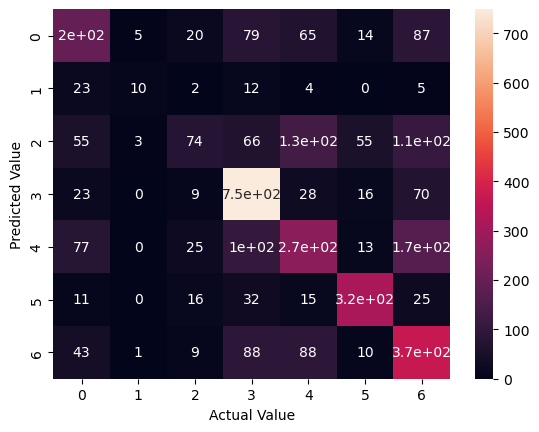

In [22]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

In [23]:
#fitting the model using Image data generator
batch_size = 256
epochs = 25

#model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

img_generator_train = img_gen.flow(x_train, y_train, batch_size = batch_size)
model.fit(img_generator_train, epochs=25, steps_per_epoch=batch_size)

Epoch 1/25


D:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.6646 - loss: 0.8898 
Epoch 2/25


D:\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


256/256 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.6834 - loss: 0.8536 
Epoch 3/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.6954 - loss: 0.8169 
Epoch 4/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6942 - loss: 0.8123 
Epoch 5/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7132 - loss: 0.7750 
Epoch 6/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7229 - loss: 0.7493 
Epoch 7/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7326 - loss: 0.7240 
Epoch 8/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7414 - loss: 0.6936 
Epoch 9/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7506 - loss: 0.6817 
Epoch 10/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7554 - loss: 0.6579 
Epoch 11/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7721 - loss: 0.6229 
Epoch 12/25
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7806 - loss: 0.5934 
Epoch 13/25
256/256 ━━━━━━━━━

In [25]:
model.save('trainined_model_2.h5')

In [26]:
#evaluating the model on validation and test datasets

val_score = model.evaluate(x_val, y_val, verbose=0)
print('Loss in validation data:', val_score[0])
print('Accuracy of validation data:', 100*val_score[1])

test_score = model.evaluate(x_test,y_test, verbose=0)
print('Loss in the test data:', test_score[0])
print('Accuracy of test data:', 100 * test_score[1])


#determining classification and accuracy of test dataset

from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
y_pred = model.predict(x_test)
y_pred_list = []
y_test_list =[]

for i in y_pred:
    y_pred_list.append(np.argmax(i))
for i in y_test:
    y_test_list.append(np.argmax(i))

print("Accuracy score:", accuracy_score(y_test_list, y_pred_list))
print("Classification Report:", classification_report(y_test_list, y_pred_list))
print("Confusion Matrix:", confusion_matrix(y_test_list, y_pred_list))

cm1 = confusion_matrix(y_test_list, y_pred_list)

Loss in validation data: 2.064023733139038
Accuracy of validation data: 57.48119354248047
Loss in the test data: 2.1449854373931885
Accuracy of test data: 57.20256567001343
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy score: 0.572025633881304
Classification Report:               precision    recall  f1-score   support

           0       0.45      0.55      0.49       467
           1       0.74      0.41      0.53        56
           2       0.44      0.35      0.39       496
           3       0.76      0.76      0.76       895
           4       0.45      0.45      0.45       653
           5       0.73      0.79      0.76       415
           6       0.51      0.49      0.50       607

    accuracy                           0.57      3589
   macro avg       0.58      0.54      0.55      3589
weighted avg       0.57      0.57      0.57      3589

Confusion Matrix: [[259   4  42  40  61   9  52]
 [ 17  23   3   3   8   0   2]
 [ 64   3 176  29 116  52  56]
 [ 43   0  35 676  45

Text(50.722222222222214, 0.5, 'Predicted Value')

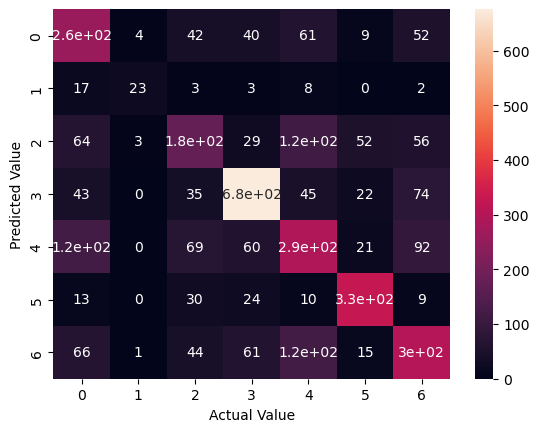

In [27]:
sns.heatmap(cm1, annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

In [69]:
#load the saved model for emotion detection
from keras.models import load_model
user_model = load_model('trainined_model_2.h5')

In [2]:
#testing a user defined model 
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
file = 'jf1.jpeg'

#convert to an image format 
o_img = image.load_img(file)
user_img = image.load_img(file, color_mode='grayscale', target_size=(48,48))

In [3]:
#convert image into an array 
img_arr = image.img_to_array(user_img)
img_arr = np.expand_dims(img_arr, axis=0)
predicted_value = user_model.predict(img_arr)

#predicting the emotion of the image
pred_emotions = predicted_value[0]

NameError: name 'np' is not defined

In [4]:
#predicting the emotion of the image
pred_emotion = predicted_value[0]

#function for displaying chart

def func_expression(emotions,newimg):
    
    #converting array of image to list
    emotionlist = emotions.tolist()
    
    #determining the emotion has the maximum value
    bestemotion = emotionlist.index(max(emotions))
    
    emo_val = ('Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral')
    if bestemotion == 0:
        emoji = image.load_img('angry.jpg')
        color = "red"
    elif bestemotion == 1:
        emoji = image.load_img('disgust.jpg')
        color = "#FA6908"
    elif bestemotion == 2:
        emoji = image.load_img('fear.jpg')
        color = "#5D51B8"
    elif bestemotion == 3:
        emoji = image.load_img('happy.jpg')
        color = "green"
    elif bestemotion == 4:
        emoji = image.load_img('sad.jpg')
        color = "yellow"
    elif bestemotion == 5:
        emoji = image.load_img('surprise.jpg')
        color = "#00EEFF"
    else:
        emoji = image.load_img('neutral.jpg')
        color = "#08FAA1"
        
    #creating the image 
    plt.figure(figsize=(20,7))
    plt.gray()
    plt.subplot(131)
    plt.imshow(newimg)

    #emotion are arranged on axis depending on length of the object
    y_pos =np.arange(len(emo_val))
    plt.subplot(132)
    plt.bar(y_pos, emotions, align='center', alpha=0.5, color=color)
    plt.xticks(y_pos,emo_val)
    plt.xlabel('Emotions')
    plt.ylabel('Percentage')
    plt.title('Display of emotion from face')

    #displaying emoji wrt emotion
    plt.subplot(133)
    plt.imshow(emoji)
    plt.title('Emoji for emotion')
    plt.show()
    
#calling the function 
func_expression(pred_emotions,o_img)

NameError: name 'predicted_value' is not defined